<a href="https://colab.research.google.com/github/MunroRoss/E-Portfolio/blob/main/Machine%20Learning/EDA_Munro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb business analysis using a data science approach

This notebook contains an analysis of Airbnb data, and is focused on answering three important business-related questions:

* How does location and room type affect the cost of the room?
* How does availability over the next year correlate to room type and location?
* What is the distribution of listings between hosts and property types?

The Data used in this notebook was sourced from Kaggle.

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data


## Importing and exploring the data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
AB_NYC_DF = pd.read_csv("/content/drive/MyDrive/University_Essex/Machine Learning/Team Project/AB_NYC_2019.csv")
AB_NYC_DF.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Dictionary:

*   **id** = Airbnb's unique identifier
for the listing
*   **name** = Name of the listing
* **host_id** = Airbnb's unique identifier for the host/user
* **host_name** = Name of the host. Usually just the first name(s).
* **neighbourhood_group** = The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
* **neighborhood**
* **latitude** = Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* **longitude** = Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* **room_type** = Entire place, Private room, Shared room
* **price** = daily price in local currency
* **minimum_nights** = minimum number of night stay for the listing (calendar rules may be different)
* **number_of_reviews** = The number of reviews the listing has
* **last_review** = The date of the last/newest review
* **reviews_per_month** = The number of reviews the listing has over the lifetime of the listing
* **calculated_host_listings_count** = The number of listings the host has in the current scrape, in the city/region geography.
* **availability_365** = avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.



In [ ]:
AB_NYC_DF.shape

(48895, 16)

This DataFrame has 16 Features and 48,895 Observations.

In [ ]:
AB_NYC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Datatypes are:

* 3 float64 (numeric)
* 7 int64 (numeric)
* 6 objects (categorical)


In [ ]:
AB_NYC_DF.isnull().any()

,0
id,False
name,True
host_id,False
host_name,True
neighbourhood_group,False
neighbourhood,False
latitude,False
longitude,False
room_type,False
price,False


In [ ]:
AB_NYC_DF.columns[AB_NYC_DF.isnull().any()]

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [ ]:
# Number of record/rows that contain null values.
AB_NYC_DF.isnull().any(axis=1).sum()

10074

In [ ]:
AB_NYC_DF.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
AB_NYC_DF.isnull().sum() / AB_NYC_DF.shape[0] * 100

,0
id,0.000000
name,0.032723
host_id,0.000000
host_name,0.042949
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


Columns with missing values are:

* name = 16 (0.03%)
* host_name = 21 (0.04%)
* last_review = 10052 (20.56%)
* reviews_per_month = 10052 (20.56%)

For analysis and the name column is not of any use and therefore can be dropped.

host_name may be relevant for distribution between hosts and property types.

for last_review and reviews_per_month, if this value is missing we can assume there are 0 reviews and hence 0 per month. These can then be filled with the numerical value 0. Last_review can be dropped.

In [ ]:
#dropping the name and last_review columns
AB_NYC_DF_drop = AB_NYC_DF.drop(["name", "last_review"], axis = 1)

In [ ]:
# Fill Na values for host_name and reviews per month.
AB_NYC_DF_drop["host_name"] = AB_NYC_DF_drop["host_name"].fillna("unknown")

AB_NYC_DF_drop["reviews_per_month"] = AB_NYC_DF_drop["reviews_per_month"].fillna(0.00)

In [ ]:
AB_NYC_DF_drop.isnull().sum()

,0
id,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
AB_NYC_DF_drop.dtypes

,0
id,int64
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64
minimum_nights,int64


Object dtypes inicate categorical variables.

## Distributions

### Numeric Features

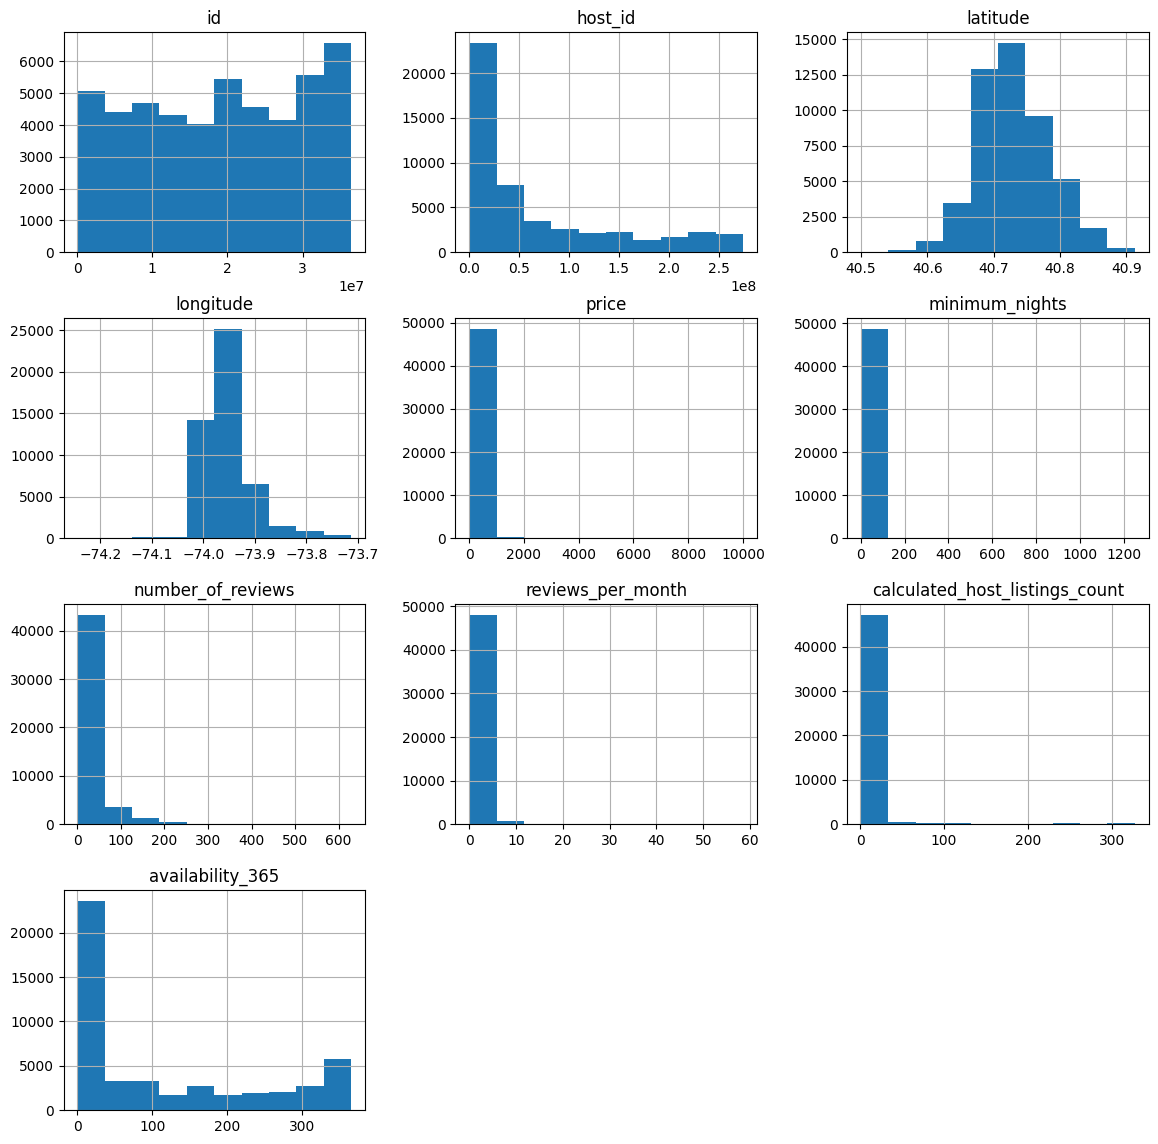

In [ ]:
# Select only numerical columns before calculating the correlation.
numerical_cols = AB_NYC_DF_drop.select_dtypes(include=['number'])

numerical_cols.hist(figsize=(14,14))
plt.show()

Longtitude and latitude seem to be normally distributed.

id has an even distribution.

The rest of the features are highly skewed to the right.
Key features to focus on are:

*   price
*   availability_365

Is it worth investigating for outliers?



In [ ]:
#Summary statistics
AB_NYC_DF_drop.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Price in dollars range from 0.00-10,000 with median being 106 and mean being 152 per night.

avalability has a range from 0-365 days, a median of 45 and mean of 112.




### Categorical Features

In [ ]:
# Summary statistics
AB_NYC_DF_drop.describe(include=['object'])

,host_name,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895,48895
unique,11453,5,221,3
top,Michael,Manhattan,Williamsburg,Entire home/apt
freq,417,21661,3920,25409


It can be seen that there are 5 unique classes in neighborhood_groups and 3 in room_type.

Manhattan having 21,661 instances and Entire home/apt having 25,409.

<Axes: xlabel='count', ylabel='neighbourhood_group'>

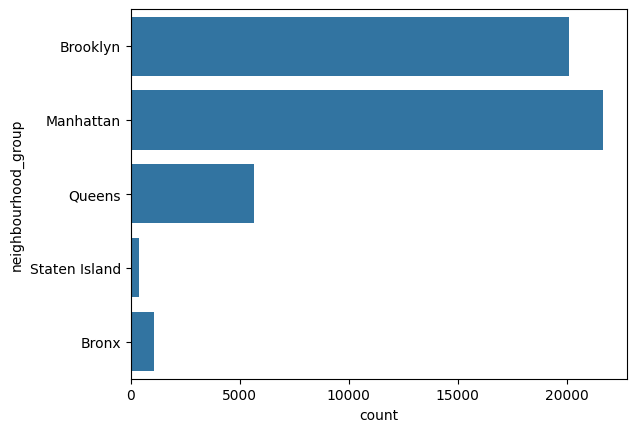

In [ ]:
# Plotting neighbourhood_group
sns.countplot(AB_NYC_DF_drop['neighbourhood_group'])

Majority of listings are based in Brooklyn and Manhattan.

<Axes: xlabel='count', ylabel='room_type'>

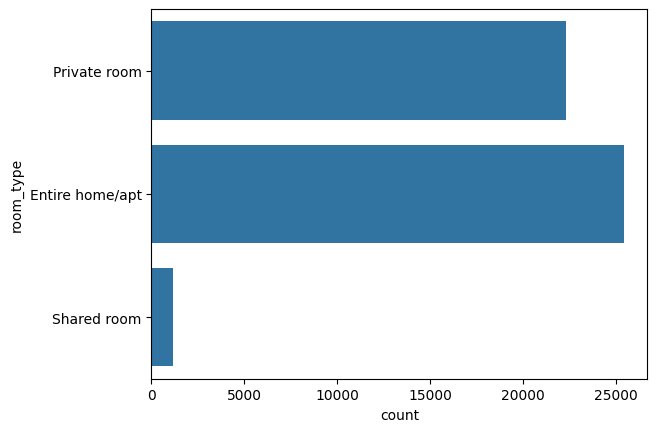

In [ ]:
# Plotting room type
sns.countplot(AB_NYC_DF_drop['room_type'])

There is a very low amount of shared room listings compared to the other classes.


## Correlation of Variables

In [ ]:
AB_corr = numerical_cols.corr()

<Axes: >

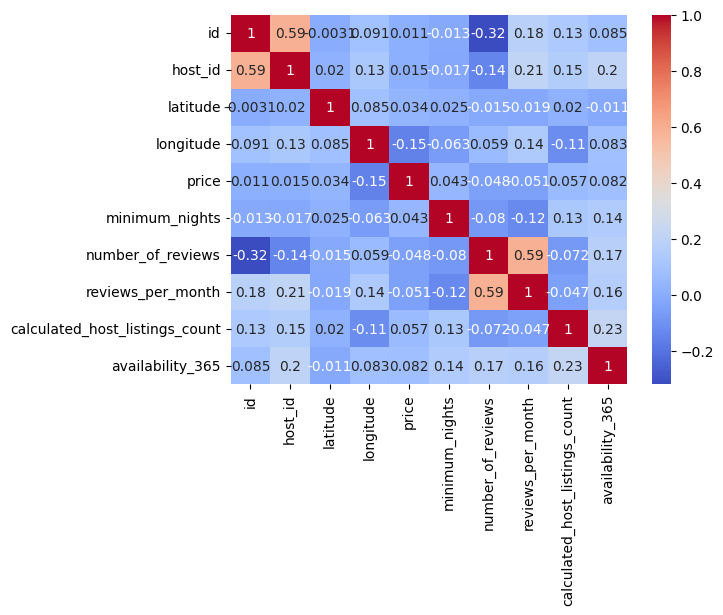

In [ ]:
sns.heatmap(AB_corr, annot = True, cmap= 'coolwarm')

Correlation between categorical and continuous variables?

https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406#:~:text=The%20computation%20is%20based%20on,and%20the%20dimension%20contingency%20matrix.

One-factor analysis of variance (ANOVA)
Compares sample means to determine if a categorical variable influences a continuous variable.

Point-biserial correlation can help us compute the correlation utilizing the standard deviation of the sample, the mean value of each binary group, and the probability of each binary category. ( variable is dichotomous (only two values))

x2y metric
Quantifies the strength of the association between variables. It works for all types of variable pairs and can capture linear and non-linear relationships.

**Kruskal-Wallis test**

 You can just inspect your data visually using some boxplots. If your data are weakly correlated, there will be a lot of overlap between the boxes.

### Box Plots

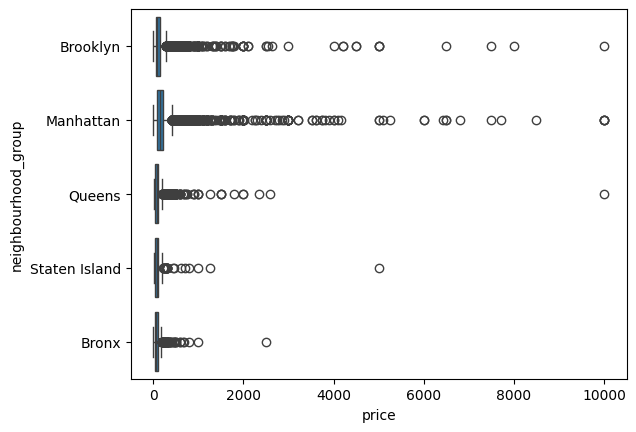

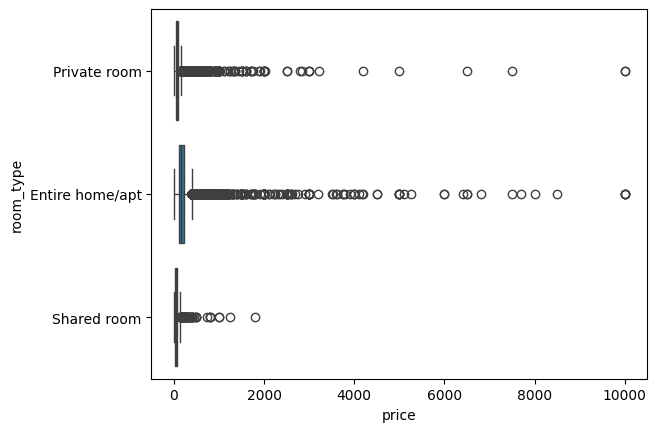

In [ ]:
for column in AB_NYC_DF_drop.select_dtypes(include='object'):
 if AB_NYC_DF_drop[column].nunique() < 10:
  sns.boxplot(y=column, x='price', data=AB_NYC_DF_drop)
  plt.show()

Due to the extrem skewness, this plot does not give us much insight. we will need to get rid of outliers.



*   “maximum non-outlier”: calculated by (Q3 + 1.5*IQR).
*   “minimum non-outlier”: calculated by (Q1 – 1.5*IQR).




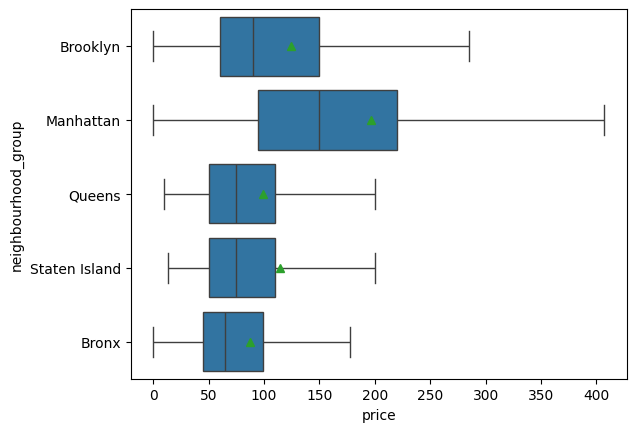

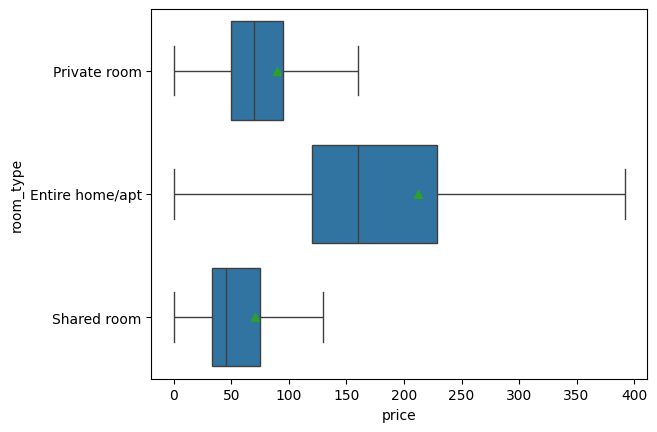

In [ ]:
# Getting rid of outliers
for column in AB_NYC_DF_drop.select_dtypes(include='object'):
 if AB_NYC_DF_drop[column].nunique() < 10:
  sns.boxplot(y=column, x='price', data=AB_NYC_DF_drop, showfliers = False, showmeans=True)
  plt.show()